# A Palette of Operations

You have a palette of operations to apply to data for visualization.

<img src="images/palette.png">

## Filtering Operations

* Relationships:
    * Equality, inequality
    * Quantitative values (less than, greater than)
    * Intersection, disjoint
* Subsampling
    * Regular sampling
    * Randomized sampling
    * Nyquist frequency
* Related data queries
    * Queries on other columns at fixed row location
    * External membership queries

## Sampling Examples

<img src="images/sampling_examples.png">

Sampling enables the selection of right data points from within the larger data set to estimate the characteristics of the whole population.

<img src="images/sampling_examples1.png">

Sample size is an important process, in order to make sure the data is properly represented.

<img src="images/sampling_examples2.png">

Simple random sampling however is vulnerable to error because the randomness of the selection may result in a sample that doesn't reflect the makeup of the data.

## Mutation Operations
* Mathematical operations, such as injective operations
    * Logarithmic versus linear representations
    * Arithmetic or multiplicative relationships
    * Mnaifold remapping
* Smoothing (reduction; not injective)
* Histograms (reduction; not injective)

## Binning

A technique used to reduce the effects of minor observation errors. The original data values which fall in a given interval are replaced by a value representative of that interval.

<img src="images/binning.png">

There are multple ways to bin including:
* sum
* average
* weighted average

## Splitting Operations

<img src="images/splitting1.png">

Split the data in segments, allowing the user to perform comparison between different segments.

<img src="images/splitting2.png">

# Building Classes

This week we are going to continue to add to our palette of operations by using classes.  This is going to be both an introduction to a set of operations (which we will later use as provided in pandas) as well as a discussion of how to write classes, and the advantages of doing so.

**Note:** In this notebook, I will be duplicating cells numerous times and expanding them.  In particular, I will do this for the `Dataset` class.  You won't need to do this in your work, and you can just update the definition cell as need be.  (Although, any instances of that class will need to be re-created.)

First, let's take a brief moment to talk about how white-space delimits flow control in Python.  Compare these two operations:

In [1]:
for i in range(10):
    b = i * 2
    print(b)

0
2
4
6
8
10
12
14
16
18


with:

In [2]:
for i in range(10):
    b = i * 2
print(b)

18


As you can see, for the first one (as is visually clear) the print call is inside the loop; the latter, it is outside the loop.  This is identified by the difference in indentation of the two statements.

## Classes

We're going to start out by creating classes.  Classes are essentially "patterns" of objects, wherein objects are instantiated from them, and then can deviate.  Here is a simple, trivial example, where we define a `Dataset` object that does ... nothing.  The `pass` statement here is just to satisfy Python's rules for how empty classes are defined.

You can define `attributes` on a class, which are values or variables, and `methods`, which are functions.

In [3]:
class Dataset:
    pass

We can now call the class like a function, and it becomes an object:

In [4]:
d = Dataset()
d

We can do this again:

In [5]:
f = Dataset()

In [6]:
d is f

False

So we've checked; we now have two different objects.  But if we then try setting a new variable to `d`, we can see that we are *referencing*, not *copying*, the original object.

In [7]:
g = d

In [8]:
g is d

True

Let's get ourselves set up.  We'll set up matplotlib, import our libraries, and get to work creating our `Dataset` object.

In [9]:
%matplotlib inline

In [10]:
import numpy as np
import csv
import matplotlib.pyplot as plt

We'll make our initial pass at the class do a tiny bit more.  We will now define a "special" method, `__init__`, which is called whenever the class is created.  One gotcha here is that implicitly, the `self` argument refers to the instance of the class, and does not need to be supplied.  So we will accept a `data` argument in the class, and set `self.data` equal to it.  (Note that this does not make a copy of data -- so any in-place changes will be reflected!)

In [11]:
class Dataset:
    def __init__(self, data):
        self.data = data

Even though we're going to use `data` as a dictionary like we get from our favorite data file, it does not need to be.  In fact, it can be anything, including a number:

In [12]:
d = Dataset( 1.095 )

In [13]:
d.data

1.095

We'll talk about typing and ensuring correct types at a later time.  For now, let's supply an empty dictionary to the `Dataset` object, and check that it's accessible.

In [18]:
d = Dataset( {} )

In [19]:
d.data

{}

Great.  We'll read in our data, exactly as we have done in previous weeks.

In [20]:
with open("data/Building_Inventory.csv", "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    data = {}
    for column in header:
        data[column] = []
    for row in reader:
        for column, value in zip(header, row):
            data[column].append(value)

Now, pass that in!

In [21]:
d = Dataset(data)

One thing that we have done in the past has been to convert the data types after reading them in.  We will add another "method" function called `convert` that we'll have do an in-place conversion of a given column.

In [22]:
class Dataset:
    def __init__(self, data):
        self.data = data
        
    def convert(self, column, dtype):
        self.data[column] = np.array(self.data[column], dtype=dtype)
        
d = Dataset(data)

We can use the value types we have used before, and call `convert` with them.

In [23]:
value_types = {'Zip code': 'int',
               'Congress Dist': 'int',
               'Senate Dist': 'int',
               'Year Acquired': 'int',
               'Year Constructed': 'int',
               'Square Footage': 'float',
               'Total Floors': 'int',
               'Floors Above Grade': 'int',
               'Floors Below Grade': 'int'}

print("Before: {}".format(type(d.data["Total Floors"])))

for key in d.data.keys():
    d.convert(key, value_types.get(key, "str"))

print("After: {}".format(type(d.data["Total Floors"])))

Before: <class 'list'>
After: <class 'numpy.ndarray'>


It's becoming obvious that we need a convenient way to see all the columns we have, so let's add a `.columns()` method.

In [24]:
class Dataset:
    def __init__(self, data):
        self.data = data
        
    def convert(self, column, dtype):
        self.data[column] = np.array(self.data[column], dtype=dtype)
        
    def columns(self):
        return self.data.keys()
        
d = Dataset(data)

value_types = {'Zip code': 'int',
               'Congress Dist': 'int',
               'Senate Dist': 'int',
               'Year Acquired': 'int',
               'Year Constructed': 'int',
               'Square Footage': 'float',
               'Total Floors': 'int',
               'Floors Above Grade': 'int',
               'Floors Below Grade': 'int'}

for key in d.columns():
    d.convert(key, value_types.get(key, "str"))

In [25]:
d.columns()

dict_keys(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County', 'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name', 'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired', 'Year Constructed', 'Square Footage', 'Total Floors', 'Floors Above Grade', 'Floors Below Grade', 'Usage Description', 'Usage Description 2', 'Usage Description 3'])

We will now start adding functions we're familiar with, starting with the `filter_eq` function from last week.

**Note:** Here, we are returning *new* `Dataset` instances, with copies of the arrays.  This is fine for the size of data (and expected number of filtering operations) we have in this example.  For much larger examples, it will not be, and we will address that in future classes.

In [26]:
class Dataset:
    def __init__(self, data):
        self.data = data
        
    def convert(self, column, dtype):
        self.data[column] = np.array(self.data[column], dtype=dtype)
        
    def columns(self):
        return self.data.keys()
    
    def filter_eq(self, column, value):
        good = (self.data[column] == value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
        
d = Dataset(data)

value_types = {'Zip code': 'int',
               'Congress Dist': 'int',
               'Senate Dist': 'int',
               'Year Acquired': 'int',
               'Year Constructed': 'int',
               'Square Footage': 'float',
               'Total Floors': 'int',
               'Floors Above Grade': 'int',
               'Floors Below Grade': 'int'}

for key in d.columns():
    d.convert(key, value_types.get(key, "str"))

d2 = d.filter_eq("Agency Name", "Department of Natural Resources")

In [27]:
d2.data["Senate Dist"]

array([47, 47, 47, ..., 48, 59, 46])

Seems like we need an easy way to figure out how many items there are in the dataset.  We'll use a `size` method.

In [28]:
class Dataset:
    def __init__(self, data):
        self.data = data
        
    def convert(self, column, dtype):
        self.data[column] = np.array(self.data[column], dtype=dtype)
        
    def columns(self):
        return self.data.keys()
    
    def filter_eq(self, column, value):
        good = (self.data[column] == value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def size(self):
        for key in self.data:
            return self.data[key].size
        
d = Dataset(data)

value_types = {'Zip code': 'int',
               'Congress Dist': 'int',
               'Senate Dist': 'int',
               'Year Acquired': 'int',
               'Year Constructed': 'int',
               'Square Footage': 'float',
               'Total Floors': 'int',
               'Floors Above Grade': 'int',
               'Floors Below Grade': 'int'}

for key in d.columns():
    d.convert(key, value_types.get(key, "str"))
print("Pre-filter: {}".format(d.size()))
d2 = d.filter_eq("Agency Name", "Department of Natural Resources")
print("Post-filter: {}".format(d2.size()))

Pre-filter: 8849
Post-filter: 3248


We'll add on the other methods we developed last week: less than, greater than, not equal, and stats.

Our stats method will operate on all of our columns simultaneously, however.  Additionally, we have to add on a quick check to make sure that we *can* perform mathematical operations on the columns.

In [29]:
class Dataset:
    def __init__(self, data):
        self.data = data
        
    def convert(self, column, dtype):
        self.data[column] = np.array(self.data[column], dtype=dtype)
        
    def columns(self):
        return self.data.keys()
    
    def filter_eq(self, column, value):
        good = (self.data[column] == value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_lt(self, column, value):
        good = (self.data[column] < value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_gt(self, column, value):
        good = (self.data[column] > value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_ne(self, column, value):
        good = (self.data[column] != value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def size(self):
        for key in self.data:
            return self.data[key].size
    
    def stats(self):
        statistics = {}
        for key in self.data:
            if self.data[key].dtype not in ("float", "int"):
                continue
            values = self.data[key]
            statistics[key] = (values.min(), values.max(), values.std(), values.mean())
        return statistics
    
d = Dataset(data)

value_types = {'Zip code': 'int',
               'Congress Dist': 'int',
               'Senate Dist': 'int',
               'Year Acquired': 'int',
               'Year Constructed': 'int',
               'Square Footage': 'float',
               'Total Floors': 'int',
               'Floors Above Grade': 'int',
               'Floors Below Grade': 'int'}

for key in d.columns():
    d.convert(key, value_types.get(key, "str"))
print("Pre-filter: {}".format(d.size()))
d2 = d.filter_eq("Agency Name", "Department of Natural Resources")
print("Post-filter: {}".format(d2.size()))

Pre-filter: 8849
Post-filter: 3248


## Formatting Strings

Formatting strings helps to ensure uniform output, particularly when examining multiple different datasets and their numeric values.  We will use the `.format` operation; for more information, see the [Python documentation](https://docs.python.org/3/library/string.html#formatstrings).

We'll start out with simple floating point representations, with the `f`, `e` and default examples.

In [30]:
val = -0.950714287492
print("{0} or {0:+.3f} or {0:0.5e} or {0:7.5f}".format(val))

-0.950714287492 or -0.951 or -9.50714e-01 or -0.95071


Something that will come in particularly handy for us is string-padding.  We can pad out a string to a given length, for instance 20.

In [31]:
print("{0:20s} -> 1".format("hi"))

hi                   -> 1


Now, let's compare the stats for our two different datasets -- filtered and unfiltered.

In [32]:
stats1 = d.stats()
stats2 = d2.stats()
for column in d.columns():
    if column not in stats1: continue
    print("Column '{0:25s}'".format(column))
    for s1, s2 in zip(stats1[column], stats2[column]):
        print("    {0} vs {1}".format(s1, s2))

Column 'Zip code                 '
    1235 vs 1235
    68297 vs 68297
    1096.040039528023 vs 1346.8355268792554
    61819.58831506385 vs 61867.06650246305
Column 'Congress Dist            '
    0 vs 0
    18 vs 18
    4.141781466447568 vs 3.1053213758379408
    13.332127924059217 vs 14.387007389162562
Column 'Senate Dist              '
    0 vs 6
    60 vs 60
    11.828633795912243 vs 9.126223508578196
    46.36874223076054 vs 48.10036945812808
Column 'Year Acquired            '
    0 vs 0
    2016 vs 2015
    320.1951802951111 vs 405.14285352287663
    1919.0273477229066 vs 1891.7413793103449
Column 'Year Constructed         '
    0 vs 0
    2017 vs 2016
    336.43416029812164 vs 448.10887281720636
    1911.4525935133913 vs 1869.280172413793
Column 'Square Footage           '
    0.0 vs 0.0
    1200000.0 vs 183175.0
    38195.906418657236 vs 5467.006308903433
    11497.949937846084 vs 1272.1345443349753
Column 'Total Floors             '
    0 vs 0
    31 vs 7
    1.541827235763174

Hmm, we can do this a bit nicer; let's make our floating point values all the same size, and label them.

In [33]:
stats1 = d.stats()
stats2 = d2.stats()
for column in d.columns():
    if column not in stats1: continue
    print("Column '{0:25s}'".format(column))
    mi1, ma1, st1, me1 = stats1[column]
    mi2, ma2, st2, me2 = stats2[column]
    print("    min: {0:20.3f} vs {0:20.3f}".format(mi1, mi2))
    print("    max: {0:20.3f} vs {0:20.3f}".format(ma1, ma2))
    print("    std: {0:20.3f} vs {0:20.3f}".format(st1, st2))
    print("    avg: {0:20.3f} vs {0:20.3f}".format(me1, me2))

Column 'Zip code                 '
    min:             1235.000 vs             1235.000
    max:            68297.000 vs            68297.000
    std:             1096.040 vs             1096.040
    avg:            61819.588 vs            61819.588
Column 'Congress Dist            '
    min:                0.000 vs                0.000
    max:               18.000 vs               18.000
    std:                4.142 vs                4.142
    avg:               13.332 vs               13.332
Column 'Senate Dist              '
    min:                0.000 vs                0.000
    max:               60.000 vs               60.000
    std:               11.829 vs               11.829
    avg:               46.369 vs               46.369
Column 'Year Acquired            '
    min:                0.000 vs                0.000
    max:             2016.000 vs             2016.000
    std:              320.195 vs              320.195
    avg:             1919.027 vs             1919.

We can now absorb the `compare` function back into our class:

In [34]:
class Dataset:
    def __init__(self, data):
        self.data = data
        
    def convert(self, column, dtype):
        self.data[column] = np.array(self.data[column], dtype=dtype)
        
    def columns(self):
        return self.data.keys()
    
    def filter_eq(self, column, value):
        good = (self.data[column] == value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_lt(self, column, value):
        good = (self.data[column] < value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_gt(self, column, value):
        good = (self.data[column] > value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_ne(self, column, value):
        good = (self.data[column] != value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def size(self):
        for key in self.data:
            return self.data[key].size
    
    def stats(self):
        statistics = {}
        for key in self.data:
            if self.data[key].dtype not in ("float", "int"):
                continue
            values = self.data[key]
            statistics[key] = (values.min(), values.max(), values.std(), values.mean())
        return statistics
    
    def compare(self, other):
        stats1 = self.stats()
        stats2 = other.stats()
        for column in self.columns():
            if column not in stats1: continue
            print("Column '{0:25s}'".format(column))
            for s1, s2 in zip(stats1[column], stats2[column]):
                print("    {0} vs {1}".format(s1, s2))
    
d = Dataset(data)

value_types = {'Zip code': 'int',
               'Congress Dist': 'int',
               'Senate Dist': 'int',
               'Year Acquired': 'int',
               'Year Constructed': 'int',
               'Square Footage': 'float',
               'Total Floors': 'int',
               'Floors Above Grade': 'int',
               'Floors Below Grade': 'int'}

for key in d.columns():
    d.convert(key, value_types.get(key, "str"))
print("Pre-filter: {}".format(d.size()))
d2 = d.filter_eq("Agency Name", "Department of Natural Resources")
print("Post-filter: {}".format(d2.size()))
d.compare(d2)

Pre-filter: 8849
Post-filter: 3248
Column 'Zip code                 '
    1235 vs 1235
    68297 vs 68297
    1096.040039528023 vs 1346.8355268792554
    61819.58831506385 vs 61867.06650246305
Column 'Congress Dist            '
    0 vs 0
    18 vs 18
    4.141781466447568 vs 3.1053213758379408
    13.332127924059217 vs 14.387007389162562
Column 'Senate Dist              '
    0 vs 6
    60 vs 60
    11.828633795912243 vs 9.126223508578196
    46.36874223076054 vs 48.10036945812808
Column 'Year Acquired            '
    0 vs 0
    2016 vs 2015
    320.1951802951111 vs 405.14285352287663
    1919.0273477229066 vs 1891.7413793103449
Column 'Year Constructed         '
    0 vs 0
    2017 vs 2016
    336.43416029812164 vs 448.10887281720636
    1911.4525935133913 vs 1869.280172413793
Column 'Square Footage           '
    0.0 vs 0.0
    1200000.0 vs 183175.0
    38195.906418657236 vs 5467.006308903433
    11497.949937846084 vs 1272.1345443349753
Column 'Total Floors             '
    0 vs 

## Splitting Datasets

We now have a base dataset, which we will want to split out -- this is a common operation, wherein instead of just filtering and "throwing away" datasets based on their characteristics, we want to create new ones for each unique value.

Last week, we did this with agencies, in an *ad hoc* way.  We will do it again this week, but in a formalized way, by adding a `split` method to our `Dataset` object.  This will iterate over all the unique values in a column and return new `Dataset` objects for each.

In [35]:
class Dataset:
    def __init__(self, data):
        self.data = data
        
    def convert(self, column, dtype):
        self.data[column] = np.array(self.data[column], dtype=dtype)
        
    def columns(self):
        return self.data.keys()
    
    def filter_eq(self, column, value):
        good = (self.data[column] == value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_lt(self, column, value):
        good = (self.data[column] < value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_gt(self, column, value):
        good = (self.data[column] > value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_ne(self, column, value):
        good = (self.data[column] != value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def size(self):
        for key in self.data:
            return self.data[key].size
    
    def stats(self):
        statistics = {}
        for key in self.data:
            if self.data[key].dtype not in ("float", "int"):
                continue
            values = self.data[key]
            statistics[key] = (values.min(), values.max(), values.std(), values.mean())
        return statistics
    
    def compare(self, other):
        stats1 = self.stats()
        stats2 = other.stats()
        for column in self.columns():
            if column not in stats1: continue
            print("Column '{0:25s}'".format(column))
            for s1, s2 in zip(stats1[column], stats2[column]):
                print("    {0} vs {1}".format(s1, s2))
                
    def split(self, column):
        new_datasets = {}
        for split_value in np.unique(self.data[column]):
            new_datasets[split_value] = self.filter_eq(column, split_value)
        return new_datasets
    
d = Dataset(data)

value_types = {'Zip code': 'int',
               'Congress Dist': 'int',
               'Senate Dist': 'int',
               'Year Acquired': 'int',
               'Year Constructed': 'int',
               'Square Footage': 'float',
               'Total Floors': 'int',
               'Floors Above Grade': 'int',
               'Floors Below Grade': 'int'}

for key in d.columns():
    d.convert(key, value_types.get(key, "str"))
print("Pre-filter: {}".format(d.size()))
d2 = d.filter_eq("Agency Name", "Department of Natural Resources")
print("Post-filter: {}".format(d2.size()))


Pre-filter: 8849
Post-filter: 3248


Let's try this on Agency Name.

In [36]:
splits = d.split("Agency Name")

In [37]:
splits.keys()

dict_keys(['Appellate Court / Fifth District', 'Appellate Court / Fourth District', 'Appellate Court / Second District', 'Appellate Court / Third District', 'Chicago State University', 'Department of Agriculture', 'Department of Central Management Services', 'Department of Corrections', 'Department of Human Services', 'Department of Juvenile Justice', 'Department of Military Affairs', 'Department of Natural Resources', 'Department of Public Health', 'Department of Revenue', 'Department of State Police', 'Department of Transportation', "Department of Veterans' Affairs", 'Eastern Illinois University', "Governor's Office", 'Governors State University', 'Historic Preservation Agency', 'IL State Board of Education', 'Illinois Board of Higher Education', 'Illinois Community College Board', 'Illinois Courts', 'Illinois Emergency Management Agency', 'Illinois Medical District Commission', 'Illinois State University', 'Northeastern Illinois University', 'Northern Illinois University', 'Office o

Let's see how the min/max buildings compare.

In [38]:
for agency in splits:
    stats = splits[agency].stats()
    print("For {0:45s} min sq footage = {1: 10.1f} max sq footage = {2: 10.1f}".format(agency, stats["Square Footage"][0], stats["Square Footage"][1]))

For Appellate Court / Fifth District              min sq footage =    15124.0 max sq footage =    15124.0
For Appellate Court / Fourth District             min sq footage =    16400.0 max sq footage =    16400.0
For Appellate Court / Second District             min sq footage =    43330.0 max sq footage =    43330.0
For Appellate Court / Third District              min sq footage =     3700.0 max sq footage =    15000.0
For Chicago State University                      min sq footage =      196.0 max sq footage =   185458.0
For Department of Agriculture                     min sq footage =        0.0 max sq footage =   149400.0
For Department of Central Management Services     min sq footage =      150.0 max sq footage =  1200000.0
For Department of Corrections                     min sq footage =        0.0 max sq footage =   307288.0
For Department of Human Services                  min sq footage =        0.0 max sq footage =   140000.0
For Department of Juvenile Justice            

And, we'll also add a `.plot` method to make this a bit easier, too.

In [39]:
class Dataset:
    def __init__(self, data):
        self.data = data
        
    def convert(self, column, dtype):
        self.data[column] = np.array(self.data[column], dtype=dtype)
        
    def columns(self):
        return self.data.keys()
    
    def filter_eq(self, column, value):
        good = (self.data[column] == value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_lt(self, column, value):
        good = (self.data[column] < value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_gt(self, column, value):
        good = (self.data[column] > value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_ne(self, column, value):
        good = (self.data[column] != value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def size(self):
        for key in self.data:
            return self.data[key].size
    
    def stats(self):
        statistics = {}
        for key in self.data:
            if self.data[key].dtype not in ("float", "int"):
                continue
            values = self.data[key]
            statistics[key] = (values.min(), values.max(), values.std(), values.mean())
        return statistics
    
    def compare(self, other):
        stats1 = self.stats()
        stats2 = other.stats()
        for column in self.columns():
            if column not in stats1: continue
            print("Column '{0:25s}'".format(column))
            for s1, s2 in zip(stats1[column], stats2[column]):
                print("    {0} vs {1}".format(s1, s2))
                
    def split(self, column):
        new_datasets = {}
        for split_value in np.unique(self.data[column]):
            new_datasets[split_value] = self.filter_eq(column, split_value)
        return new_datasets
    
    def plot(self, x_column, y_column):
        plt.plot(self.data[x_column], self.data[y_column], '.')
    
d = Dataset(data)

value_types = {'Zip code': 'int',
               'Congress Dist': 'int',
               'Senate Dist': 'int',
               'Year Acquired': 'int',
               'Year Constructed': 'int',
               'Square Footage': 'float',
               'Total Floors': 'int',
               'Floors Above Grade': 'int',
               'Floors Below Grade': 'int'}

for key in d.columns():
    d.convert(key, value_types.get(key, "str"))
print("Pre-filter: {}".format(d.size()))
d2 = d.filter_eq("Agency Name", "Department of Natural Resources")
print("Post-filter: {}".format(d2.size()))


Pre-filter: 8849
Post-filter: 3248


We'll finish up with a couple of plots that are difficult to examine!

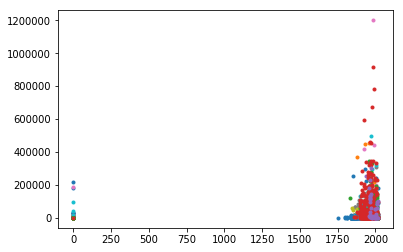

In [40]:
splits = d.split("Agency Name")
for agency in splits:
    splits[agency].plot("Year Acquired", "Square Footage")

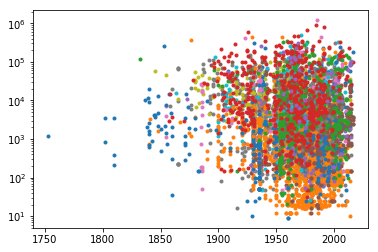

In [41]:
d2 = d.filter_gt("Year Acquired", 0)
splits = d2.split("Agency Name")
for agency in splits:
    splits[agency].plot("Year Acquired", "Square Footage")
plt.yscale("log")